# Libraries in need

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import os

from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.layers.embeddings import Embedding

from keras.optimizers import RMSprop, Adam

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split


# Exploring the dataset

In [3]:
df = pd.read_csv(r'C:\Users\Anestis\Desktop\Limbo\4_IEEE\AI_SG_NLP_COURSE\LSTM_Spam_Emails\spam_or_not_spam.csv')

## Get to know the data

In [4]:
df.head()

,email,label
0,mike bostock said received from trackingNUMBE...,0
1,no i was just a little confused because i m r...,0
2,this is just an semi educated guess if i m wro...,0
3,jm URL justin mason writes except for NUMBER t...,0
4,i just picked up razor sdk NUMBER NUMBER and N...,0


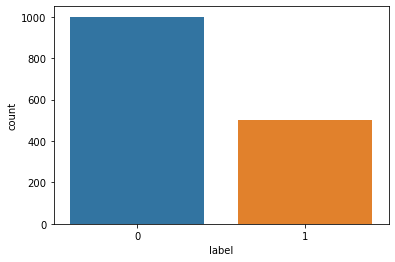

In [4]:
sns.countplot(x='label', data=df)

In [5]:
print("not spam emails: ", df[df.label == 0].count())
print("spam emails: ", df[df.label == 1].count())
print("shape: ", df.shape)

not spam emails:  email    1000
label    1000
dtype: int64
spam emails:  email    499
label    500
dtype: int64
shape:  (1500, 2)


# Preprocessing Stage

## Basic clean

In [6]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.shape

(1376, 2)

## Text Processing

1. Lemmatization
2. Strings -> Lists of words
3. Words to lower
4. Stopwords Execution

In [7]:
def process(text):
    lemmatizer = WordNetLemmatizer()
  
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc).lower()
    clean = [lemmatizer.lemmatize(word) for word in nopunc.split() if word.lower() not in stopwords.words('english')]

    return clean

df['email'] = df['email'].apply(process)

new 'email form'

In [8]:
df.email

0       [mike, bostock, said, received, trackingnumber...
1       [little, confused, running, procmail, gateway,...
2       [semi, educated, guess, wrong, someone, please...
3       [jm, url, justin, mason, writes, except, numbe...
4       [picked, razor, sdk, number, number, number, n...
                              ...                        
1495    [abc, good, morning, america, rank, number, ch...
1496    [hyperlink, hyperlink, hyperlink, let, mortgag...
1497    [thank, shopping, u, gift, occasion, free, gif...
1498    [famous, ebay, marketing, e, course, learn, se...
1499    [hello, chinese, traditional, 子, 件, number世, o...
Name: email, Length: 1376, dtype: object

# The Model

## Test / Train split


In [9]:
X = df.email
Y = df.label

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

## Tokenization
Words -> integers
#### max email length -> 400 (almost max email length in the dataset) => test different max lengths
#### max sequence length -> 150 

In [10]:
max_words = 400
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)

sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [11]:
sequences_matrix

array([[  0,   0,   0, ...,  20,   2,   2],
       [  0,   0,   0, ...,   1,   1,   1],
       [  0,   0,   0, ...,  20,   2,   2],
       ...,
       [  0,   0,   0, ...,  89,  78,   2],
       [  0,   0,   0, ...,   2,   1,   2],
       [  0,   0,   0, ...,  71, 362,  13]])

## Building the Model

1. Embedding Layer 
2. LSTM Layer
3. Dense Layer
4. ReLU Activation Function
5. Dropout -> [0.5, 0.8]
6. Sigmoid Activation function -> values belong to [0, 1]

In [12]:
def RNN():
    inputs = Input(name='Input_LAYER',shape=[max_len])
    layer = Embedding(max_words,max_len,input_length=(max_len,max_words), trainable=False, name="embedding")(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='Output_Layer')(layer)
    layer = Dense(1, activation="sigmoid", name="predictions")(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

## Compiling and training the model

In [13]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=Adam(1e-4),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LAYER (InputLayer)     [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 150)          60000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                55040     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 257   

In [14]:
history = model.fit(sequences_matrix,Y_train,batch_size=64,epochs=20,shuffle=True)

Epoch 1/20
17/17 [==============================] - 4s 109ms/step - loss: 0.6936 - accuracy: 0.4477
Epoch 2/20
17/17 [==============================] - 2s 111ms/step - loss: 0.6898 - accuracy: 0.6890
Epoch 3/20
17/17 [==============================] - 2s 105ms/step - loss: 0.6848 - accuracy: 0.6983
Epoch 4/20
17/17 [==============================] - 2s 99ms/step - loss: 0.6783 - accuracy: 0.7123
Epoch 5/20
17/17 [==============================] - 2s 101ms/step - loss: 0.6673 - accuracy: 0.7086
Epoch 6/20
17/17 [==============================] - 2s 102ms/step - loss: 0.6468 - accuracy: 0.6890
Epoch 7/20
17/17 [==============================] - 2s 98ms/step - loss: 0.5789 - accuracy: 0.6787
Epoch 8/20
17/17 [==============================] - 2s 100ms/step - loss: 0.5527 - accuracy: 0.6847
Epoch 9/20
17/17 [==============================] - 2s 107ms/step - loss: 0.5291 - accuracy: 0.6902
Epoch 10/20
17/17 [==============================] - 2s 103ms/step - loss: 0.5078 - accuracy: 0.7051
E

# Results and Evaluation

## Checking the results in the test set

In [15]:
max_words = 400
max_len = 150
tok_test = Tokenizer(num_words=max_words)
tok_test.fit_on_texts(X_test)

sequences_test = tok.texts_to_sequences(X_test)
sequences_matrix_test = pad_sequences(sequences_test,maxlen=max_len)

predictions = model.predict(sequences_matrix_test)

less than 0.5 => NOT SPAM

more than 0.5 => SPAM

In [16]:
test_pred = []
for c in predictions:
    if c > 0.5:
        test_pred.append(1)
    else:
        test_pred.append(0)

In [17]:
# Metrics
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score, classification_report

recall = recall_score(Y_test, test_pred, average='binary')
precision = precision_score(Y_test, test_pred, average='binary')
f1 = f1_score(Y_test, test_pred, average='binary')


print(classification_report(Y_test, test_pred))
print(accuracy_score(Y_test, test_pred))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85       238
           1       0.88      0.28      0.43       106

    accuracy                           0.77       344
   macro avg       0.82      0.63      0.64       344
weighted avg       0.79      0.77      0.72       344

0.7674418604651163


## Some Plots to understand better the training

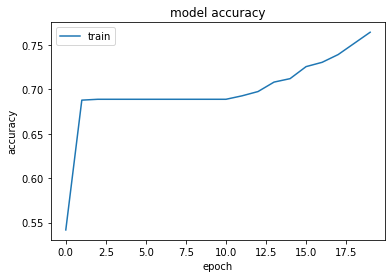

In [18]:
history.history.keys()

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

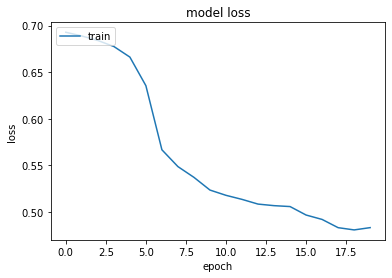

In [19]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# The stage is yours...

## Exercises

1. Στο στάδιο της προ-επεξεργασίας αν είσασταν προσεκτικοί θα έχετε παρατηρήσει ότι υπάρχουν σύμβολα στα "καθαρά δεδομένα" που δεν είναι στην αγγλική γλώσσα όπως το "件". Στόχος σας είναι να αφαιρέσετε αυτούς τους χαρακτήρες. Για να το κάνετε μπορείτε να χρησιμοποιήσετε την NLTK ή Regular Expressions (import re). Κάντε τις απαραίτητες αλλαγές στην συνάρτηση process.

2. Στο στάδιο του μοντέλου στο μέρος του tokenization δοκιμάστε να μεταβάλετε τις τιμές των max_len και max_words και παρατηρήστε πως αλλάζει η αποτελεσματικότητα του μοντέλου. 
HINT: Δοκιμάστε πολύ μεγάλες τιμές (>3000) ή πολύ μικρές (<50). 

3. Στο στάδιο του χτισήματος του μοντέλου μεταβάλετε τις τιμές στο dropout (κοντά στο 0 και κοντά στο 1). Αυξήστε τον αριθμό των epochs.Παρατηρείτε κάποια σημαντική αλλαγή στην ακρίβεια του μοντέλου;

4. Δημιουργήστε μία συνάρτηση η οποία θα δέχετε ως όρισμα ένα string το οποίο θα αποτελείτε από το κείμενο ενός email και θα δίνει ως αποτέλεσμα την πρόβλεψη του μοντέλου (spam email ή όχι).
ΗΙΝΤ #1: Μπορείτε να χρησιμοποιήσετε το περιεχόμενο της συνάρτησης process για την προεπεξεργασία.
HINT #2: Δείτε πως πήραμε αποτελέσματα για το test set 
HINT #3: Θυμηθείτε ότι το μοντέλο επιστρέφει τιμές μεταξύ του 0 και του 1.